# The numpy.random package
A notebook by Colm. Doherty, November 2018.

## About Numpy.random
The numpy.random package is a sub-package of the Numpy library<sup>[1]</sup> for the Python programming language. Numpy is used for dealing with multi-dimensional arrays of values and matrix operations in data analysis. While it’s a powerful and widely used package, users seldom interact directly with it - it’s typically accessed via one of the sub-packages such as numpy.random.

### It’s Overall Purpose
The purpose of numpy.random is to provide users with a selection of methods by which pseudo random numbers can be generated for use in various applications. A typical application is in the creation of sampling plans. 

While its not currently possible for a computer to create truly random values, pseudo random numbers (derived from any method using computational algorithms) offer a useful simulation of actual random values. In theory, a higher degree of apparent randomness may characterise numbers generated from methods using electromagnetic atmospheric noise as a source input. <sup>[2]</sup> With the advent of ‘quantum computing’ perhaps it may finally become possible to generate truly random values. 

### Who needs random numbers?

Random numbers and probability distributions are an essential input into data modeling and prediction making. These include weather prediction, earthquake prediction, professional sports & training (eg. probability of making a basketball shot from various positions on the court), Mean Time Between Failure (MTBF) for electronic components, financial investment decisions, sports betting, pharma drug trials, etc. 

A randomized controlled trial (RCT) is a type of scientific (often medical) experiment which aims to reduce bias when testing a new treatment. The people participating in the trial are randomly allocated to either the group receiving the treatment under investigation or to a group receiving standard treatment (or placebo treatment) as the control. Randomization minimises selection bias and the different comparison groups allow the researchers to determine any effects of the treatment when compared with the no treatment (control) group, while other variables are kept constant. 

The RCT is often considered the gold standard for a clinical trial. <sup>[2a]</sup> In fact the RCT is regarded as the ‘gold standard’ for all scientific experiments. Multiple Regression Analysis is often used to discover correlations and “prove” causation, but the independent variables measured often lack validity. (per. ‘Mindware: critical thinking for the information age’ - a University of Michigan course taken by the writer this summer).

Aside from their use in sampling and simulations, one real-world application for pseudo random numbers which I have personally encountered is in the online gaming industry. In this case, a stream of pseudo random numbers is accessed by connected gaming terminals in bookmakers shops, pubs etc to produce results in so-called “games of chance”, where the user’s skills have no influence on the result. As a mission critical component in the network, the random number generator (RNG) runs 24x7 for 365 days a year, and any interruption of service is flagged by loud alarms in the HQ where the operations team quickly work to restore service!

### Sampling Methods
Sampling Methods can be classified into one of two categories:<sup>[3]</sup>

1) Probability Sampling: The sample has a known probability of being selected. All of the distributions illustrated here are examples of probability sampling.These techniques are more likely to yield a sample which is representative of the whole population, to within a calculated margin of error.

2) Non-probability Sampling: The sample does not have a known probability of being selected. In contrast with probability sampling, a non-probability sample is not a product of a randomized selection processes. Subjects in a non-probability sample are usually selected on the basis of their accessibility or by the personal judgment of the researcher. <sup>[4]</sup> Such techniques are unlikely to yield a sample which is representative of the whole population.


## The use of the Simple Random Data functions 
The “Simple random data” functions<sup>[5]</sup> in numpy.random provide a range of methods for creating random values in a variety of arrays, formats and structures, depending on the specific needs of the user. This is a good starting point for devising a basic sampling plan. 


### Using numpy.random.rand
Simple random data functions in numpy.random begin with numpy.random.rand <sup>[6]</sup>, which allows you to create an array of a given shape and populate it with random floating values of a uniform distribution, from 0 to 0.99999999.
For example, here's an array of 3 sets of sample values, of 4 rows and 3 columns each, generated by np.random.rand 

In [1]:
import numpy as np

In [2]:
np.random.rand(3,4,3)

array([[[0.57781639, 0.20214871, 0.52259429],
        [0.57790152, 0.20891794, 0.45106121],
        [0.45823683, 0.94356723, 0.83644364],
        [0.85138614, 0.57054894, 0.7140152 ]],

       [[0.35842801, 0.74850605, 0.97840575],
        [0.47089677, 0.87271697, 0.79378254],
        [0.76671679, 0.90444476, 0.60970178],
        [0.67680854, 0.16378305, 0.86643375]],

       [[0.00738461, 0.96894412, 0.10237428],
        [0.38871266, 0.13697304, 0.26930229],
        [0.14943615, 0.62843986, 0.66537483],
        [0.5382036 , 0.865541  , 0.2875939 ]]])

Even in such small sample sizes, each of these values is almost as likely to appear in the array as any other, as it's a uniform distribution.

### Using numpy.random.randint

Another simple random data function is numpy.random.randint <sup>[7]</sup>, which can create an array of integers between defined low & high limits, from the “discrete uniform” distribution in the closed interval [low, high]. For example, to create an array of 10 integers, greater than 0 and less than or equal to 100 :

In [3]:
np.random.randint(100, size=10)

array([58, 35, 38, 21, 52, 19, 81, 72, 94, 39])

## Permutations
The “Permutation” functions offer a range of methods for randomising the arrangement (or order) of a defined sequence of values. This could be a good starting point for a programmer creating a music shuffle function.

In [4]:
import numpy as np

Here is an example of a permutation function using the shuffle command, starting with an initial array:

In [5]:
arr = np.arange(15)
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

Here it is, randomly shuffled:

In [6]:
np.random.shuffle(arr)
arr

array([ 6,  2,  8,  0, 10,  3, 14,  5,  4, 12,  1,  9, 11, 13,  7])

Incidently, how many permutations are possible in this example? How many unique ways could you arrange 15 books on a shelf? The answer is 15*14*13*12*11*10*9*8*7*6*5*4*3*2*1 or "factorial 15", expressed as 15! - and the number of permutations is 1.3076744e+12 .... or 1,307,674,368,000 

## About Probability Distributions

A probability distribution is a mathematical function that provides the probabilities of occurrence of different possible outcomes in an experiment.<sup>[8]</sup>
The concept of the probability distribution and the random variables which they describe underlies the mathematical discipline of probability theory, and the science of statistics. There is spread or variability in almost any value that can be measured in a population (e.g. height of people, durability of a metal, sales growth, traffic flow, etc.). 

Examples of Probability distributions include the following:

### 1. Uniform Distribution

In [7]:
import matplotlib.pyplot as plt

Lets generate 30,000 random values of between 0 and 0.99999999

In [8]:
x = np.random.rand(30000)
x

array([0.45503711, 0.30584403, 0.63716195, ..., 0.43495718, 0.52134564,
       0.14479227])

To illustrate the distribution of the random values generated by the np.random.rand function, we can use it to generate a sample of values and then plot them using the matplotlib function. 

(array([3064., 3085., 2900., 2995., 2933., 2945., 2984., 3027., 2923.,
        3144.]),
 array([3.33826694e-06, 1.00001165e-01, 1.99998992e-01, 2.99996818e-01,
        3.99994645e-01, 4.99992472e-01, 5.99990299e-01, 6.99988125e-01,
        7.99985952e-01, 8.99983779e-01, 9.99981606e-01]),
 <a list of 10 Patch objects>)

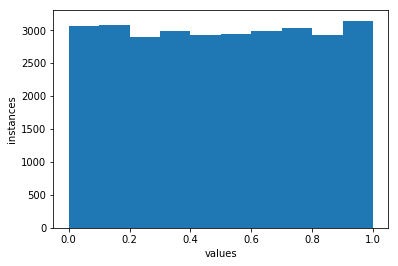

In [9]:
# Plot the distribution of these values in a histogram
plt.xlabel ('values')
plt.ylabel ('instances')
plt.hist(x)


That's what a randomly generated, essentially uniform distribution looks like. It's uniform insofaras every value in the range defined had an equal chance of being picked. We see approx 3,000 appearances of each value. 

Another function which generates a uniform distribution is np.random.uniform :

In [10]:
# randomly generate 1000 values from >-10 to <-9
s = np.random.uniform(-10,-9,1000)

the np.random.uniform function seems to show a quite different looking distribution for this 1000 unit sample, but the larger the sample size the more uniform it looks.

(array([110., 103.,  94., 109.,  86.,  87., 108.,  93., 109., 101.]),
 array([-9.99987581, -9.90007318, -9.80027055, -9.70046793, -9.6006653 ,
        -9.50086267, -9.40106005, -9.30125742, -9.20145479, -9.10165217,
        -9.00184954]),
 <a list of 10 Patch objects>)

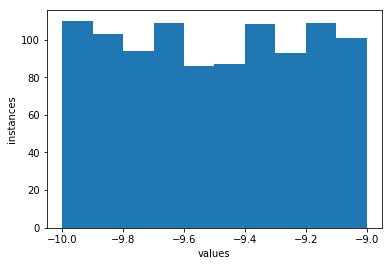

In [11]:
plt.xlabel ('values')
plt.ylabel ('instances')
plt.hist(s)

### 2. Normal Distribution

A Normal (or Gaussian) distribution is related to real-valued quantities that grow linearly (e.g. errors, offsets). Its the most common continuous distribution. We can use the 'numpy.random.normal' function which generates a normal distribution looking more like the classic 'bell curve'.

In [12]:
# randomly generate 1000 values, normally distributed with a mean of 0, in increments of 0.1
y = np.random.normal(0,0.1,1000)

(array([  2.,  21.,  63., 151., 196., 236., 190., 104.,  30.,   7.]),
 array([-0.32889849, -0.26579905, -0.20269962, -0.13960018, -0.07650074,
        -0.0134013 ,  0.04969813,  0.11279757,  0.17589701,  0.23899644,
         0.30209588]),
 <a list of 10 Patch objects>)

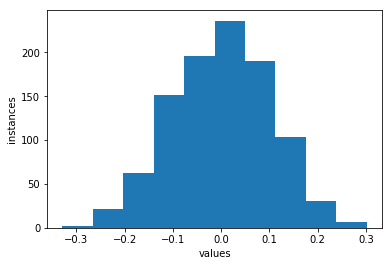

In [13]:
# plot the distribution
plt.xlabel ('values')
plt.ylabel ('instances')
plt.hist(y)

This Normal distribution shows observations clustered around the Mean value of zero. The chances of values close to zero being picked are greater than for those at the extremities of the distribution. Typically 95% of all observations in a Normal distribution fall within +/- 2 Standard Deviations from the Mean.

Notice that its the 1st digit in np.random.normal (0,0.1,10000) which defines the MEAN in this distribution - in this case 0. You can make it any value you choose. Equally, the 2nd digit defines the intervals in the range.

### 3. Pareto Distribution

The Pareto distribution seeks to describe quantities which have a particular property: namely, that a few items account for a lot of it and a lot of items account for a little of it.

For example, if we think of wealth distribition, a small fraction of the people (the few richest ones) tend to account for a large fraction of total income, and a large fraction of the people tend to account for a small fraction of total income.<sup>[9]</sup>


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


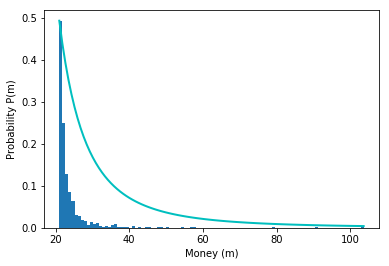

In [14]:
# Use the pareto function to draw samples from the distribution:
a, m = 2, 3.  # shape and mode
s = (np.random.pareto(a, 1000) + 7) * m

# Display the histogram of the samples, along with the probability density function:
import matplotlib.pyplot as plt
count, bins, _ = plt.hist(s, 100, normed=True)
fit = a*m**a / bins**(a+1)
plt.plot(bins, max(count)*fit/max(fit), linewidth=2, color='c')
plt.xlabel ('Money (m)')
plt.ylabel ('Probability P(m)')
plt.show ()

This pareto distribution illustrates the probabilty of a given individual securing a given share of the wealth in a country (Money(m)) - It shows that its far more probable they will secure a small share, than it is likely they will get a large share.

### 4. Binomial Distribution

The binomial distribution model is an important probability model that is used when there are two possible outcomes (hence "binomial"). <sup>[10]</sup>

For example, adults who suffer a myocardial infarction might survive the heart attack or not, a medical device such as a coronary stent might be successfully implanted or not. These are some examples of applications or processes in which the outcome of interest has two possible values (i.e., it is dichotomous). The two outcomes are often labeled "success" and "failure" with success indicating the presence of the outcome of interest. 

The binomial distribution model allows us to compute the probability of observing a specified number of "successes" when the process is repeated a specific number of times and the outcome for a given patient is either a success or a failure. 

Use of the binomial distribution requires three assumptions:

1. Each replication of the process results in one of two possible outcomes (success or failure),
2. The probability of success is the same for each replication, and
3. The replications are independent. A success in one patient does not influence the probability of success in another.

The numpy.random.binomial function is used here to illustrate the distribution. <sup>[11]</sup>


(array([ 14.,  49., 111., 208., 258., 201., 108.,  40.,   9.,   2.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

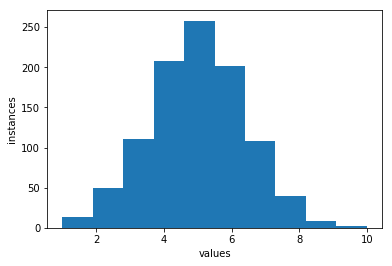

In [15]:
# plot the histogram where the number of trials = 10, 
# the probability of each trial = 50%, tested 1000 times.

plt.xlabel ('values')
plt.ylabel ('instances')
plt.hist(x = np.random.binomial(10, 0.5, 1000)) 


So, when tested 1,000 times, 5 out of 10 trials conducted gave a successful result on 250 occasions.

### 5. Exponential Distribution

The exponential distribution can be used to model the time between events in a continuous Poisson process. It is assumed that independent events occur at a constant rate. <sup>[12]</sup>

This distribution has a wide range of applications, including reliability analysis of products and systems, queuing theory, and Markov chains. For example, the exponential distribution can be used to model:

* How long it takes for electronic components to fail
* The time interval between customers' arrivals at a terminal
* Service time for customers waiting in line
* The time until default on a payment (credit risk modeling)
* Time until a radioactive nucleus decays

Lets take an example - arrival times to a bank counter are modeled by a poisson process with a rate of 30 customers per hour (expressed as 0.5 per minute). Using the random.exponential function we can calculate the probability of any given arrival rate per minute occuring. <sup>[12]</sup> <sup>[13]</sup>

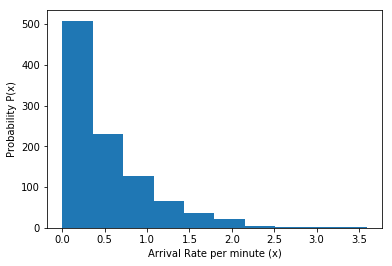

In [16]:
x = np.random.exponential(0.5,1000)
plt.hist(x)
plt.xlabel ('Arrival Rate per minute (x)')
plt.ylabel ('Probability P(x)')
plt.show()
# divide P(x) by 1000 to find the probability rate out of 1.

this shows the highest probable arrival rate is 0.5 per minute or less.

## Using Seeds in Random Number Generation (RNG)

To initiate a random number sequence a 'seed' value is required. Typically this could be the timestamp, down to the microsecond, from the processor when the RNG program starts. But the seed could be generated from any random source - eg. the temperature of the processor, or a number found somewhere in the decimal expansion of the value for Pi. 

The seed is critical to the security of a random number sequence. As long as it's unknown to any program trying to 'crack' it, it's virtually impossible to guess what the sequence will be. Equally, if the seed is known, and tests are run with enough RNG algorithms, then the "random" sequence will be discovered - a useful reminder that the sequence generated is only "pseudo random". Using a given seed and a given algoritm, the same number sequence will be generated every time.

The numpy.random library includes four functions which can be used in random number generation, examples of which now follow. <sup>[14]</sup> <sup>[15]</sup>

### 1. Numpy.random.RandomState

RandomState exposes a number of methods for generating random numbers drawn from a variety of probability distributions. The command np.random.RandomState(seed=None) constructs a random number generator. If seed is None, then RandomState will try to read data from /dev/urandom (or the Windows analogue) if available or seed from the clock otherwise. 

Lets create the RNG and call a random sequence of 5 numbers:

In [17]:
rng = np.random.RandomState(seed = None)

In [18]:
rng.randn(5)

array([ 0.47420501,  0.48510037,  1.45563539, -1.09920669, -2.25131129])

now run it again, with identical calls:


In [19]:
rng2 = np.random.RandomState(seed = None)

In [20]:
rng2.randn(5)

array([ 0.20716259, -0.39900902, -1.01416859,  0.12058963,  1.22074212])

It returned a different number sequence as (seed = None). What if we define the seed ?

In [21]:
rng = np.random.RandomState(seed = 123)

In [22]:
rng.randn(5)

array([-1.0856306 ,  0.99734545,  0.2829785 , -1.50629471, -0.57860025])

run the RNG again, with the same seed, and we get the same array of values:

In [23]:
rng3 = np.random.RandomState(seed = 123)
rng3.randn(5)

array([-1.0856306 ,  0.99734545,  0.2829785 , -1.50629471, -0.57860025])

### 2. numpy.random.seed
This method is called when RandomState is initialized (see above). It can be called again to re-seed the generator. You can also use it to manually set the seed for randint to generate random numbers.

For example, you could set the seed to 5678 and then ask randint to return a random integer within a defined range, as follows:

In [24]:
np.random.seed(5678)
np.random.randint(1, 100)

24

### 3. Numpy.random.get_state()
This command returns a tuple representing the internal state of the generator. A tuple is a sequence of values, like a list, except that tuples are immutable. The tuple returned by get_state can be used much like a seed in order to create reproducible sequences of random numbers <sup>[16]</sup>

The returned tuple has the following items:
* the string ‘MT19937’.
* a 1-D array of 624 unsigned integer keys.
* an integer pos.
* an integer has_gauss.
* a float cached_gaussian.

In [25]:
np.random.get_state()

('MT19937', array([2817670114, 1962497881,  914027948, 1463440343, 1938887794,
        1092405273, 2726328503, 2343148856,  741258043,  273416092,
        2344723317,  193056740, 3743633300,  957678078, 3876900885,
        2760083594, 1938161523, 2216869175, 2220072100, 2931112756,
        1806881730, 2710473768, 2704375294, 3428424545, 2101762119,
         160709904, 1056457662, 1569491757,  101953039, 1117059617,
        3810068043, 2107176353, 3128530458,  162517664, 1413004986,
         134885877, 1866579287,  243054771, 3354272377, 3316485039,
         766475017, 2886663670, 3827112345, 4015725661, 4012480437,
        1956829835, 1854065995,  427733846,  798972448, 1127767341,
        3551560354,  972061951,  511129661, 4186138517, 2219638225,
         791231207, 1996538239, 1598374079, 3179020503,  778160734,
         225435774, 4097810135,  912937395,  480971914,  247785298,
        3532107327,  186534415, 2564184188,  739276050,  249105914,
         871771753, 1590879840, 30140

### 4. numpy.random.set_state

This command sets the internal state of the generator from a tuple (of the same parameters  as that generated by the numpy.random.get_state() command (above). It can be used if needed to manually (re-)set the internal state of the “Mersenne Twister”[R523523] pseudo-random number generating algorithm. <sup>[17]</sup>

The command is: numpy.random.set_state(state)
where state : tuple(str, ndarray of 624 uints, int, int, float)


#### The random.uniform function

A range of probability distributions is available to use within the RandomState function. For a uniform distribution, in which every value in the range defined has an equal chance of being picked, we can use the numpy.random.uniform function:

In [26]:
import numpy as np

(array([107., 109.,  89., 103.,  89., 105.,  99.,  87., 109., 103.]),
 array([-0.9939068 ,  9.00425749, 19.00242177, 29.00058605, 38.99875034,
        48.99691462, 58.99507891, 68.99324319, 78.99140748, 88.98957176,
        98.98773604]),
 <a list of 10 Patch objects>)

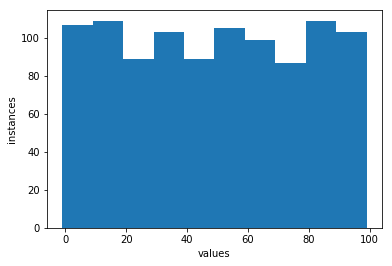

In [27]:
# The sample size is 1000 and all values are within the given interval of >= -1 and <99.
s = np.random.uniform(-1,99,1000)
plt.xlabel ('values')
plt.ylabel ('instances')
plt.hist(s)


#### The random.poisson function

The Poisson distribution is specified by one parameter: lambda (λ). This parameter equals the mean and variance. As lambda increases to sufficiently large values, the normal distribution (λ, λ) may be used to approximate the Poisson distribution. <sup>[18]</sup>

The Poisson distribution can be used to describe the number of times an event occurs in a finite observation space. For example, a Poisson distribution can describe the number of defects in the mechanical system of an airplane or the number of calls to a call center in an hour. The Poisson distribution is often used in quality control, reliability/survival studies, and insurance. A variable follows a Poisson distribution if the following conditions are met:

* Data are counts of events (nonnegative integers with no upper bound).
* All events are independent.
* Average rate does not change over the period of interest.

([array([ 0.,  0.,  4.,  8., 15., 27., 12., 18., 10.,  6.]),
  array([25., 41., 24.,  6.,  2.,  2.,  0.,  0.,  0.,  0.])],
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ]),
 <a list of 2 Lists of Patches objects>)

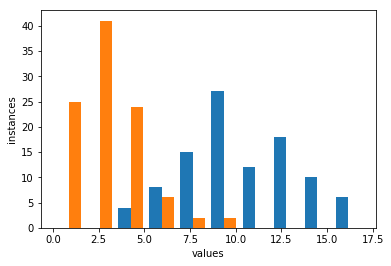

In [29]:
# generate two random samples of 100 values each, using a poision distribution with lamdas 
# of 10 and 3.
s = np.random.poisson(lam=(10, 3), size=(100, 2))
plt.xlabel ('values')
plt.ylabel ('instances')
plt.hist(s)

## Random numbers & probability - one final thought

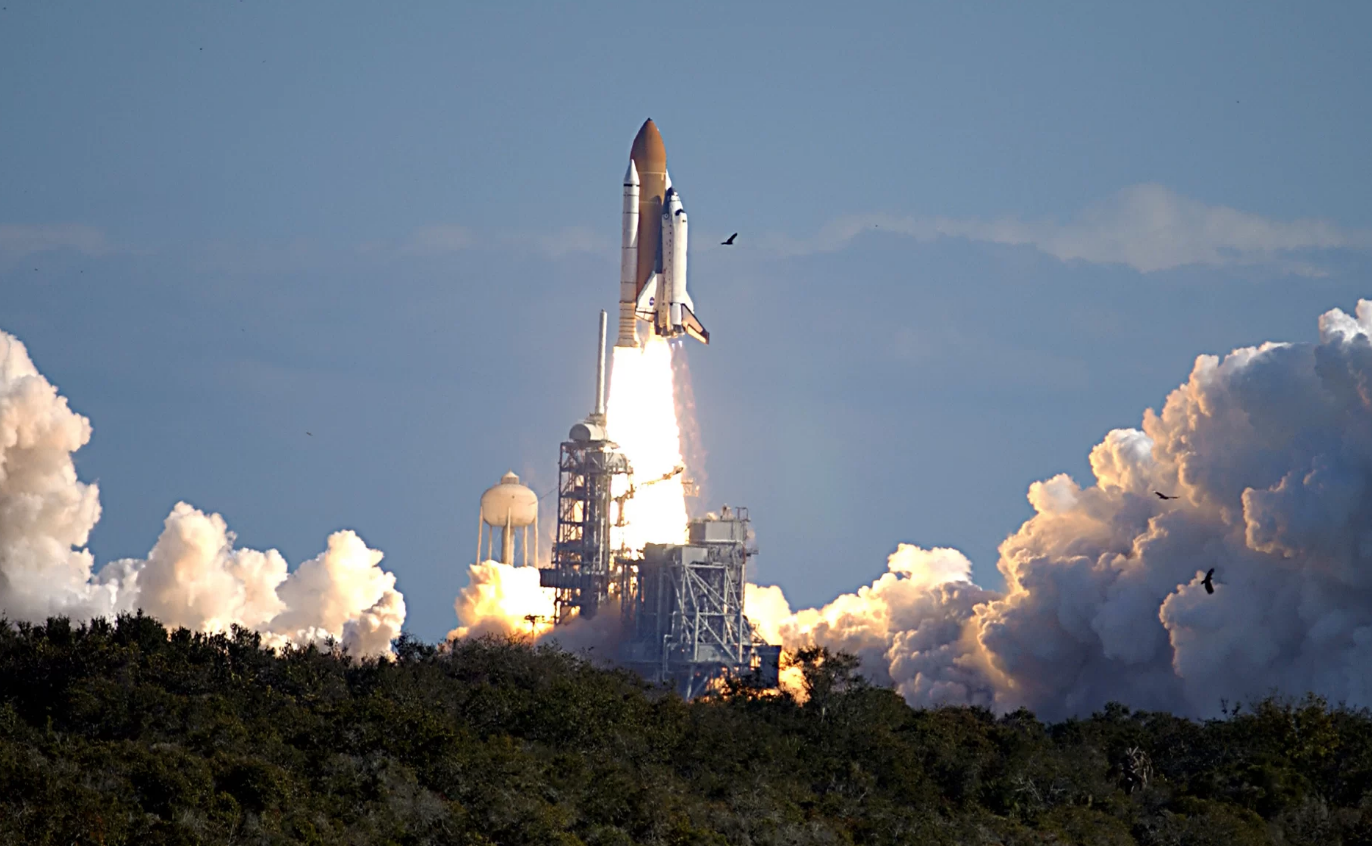

#### Loss of the Columbia Space Shuttle - 2003

On February 1, 2003, the NASA Space Shuttle "Columbia" disintegrated upon re-entering Earth's atmosphere, killing all seven crew members. The disaster was the second fatal accident in the Space Shuttle program after Space Shuttle "Challenger", which broke apart and killed the seven-member crew 73 seconds after liftoff in 1986 (Wikipedia).

At the time, I recall that the public & media were in a state of shock, which was understandable. There were predictable knee-jerk demands to end the Shuttle program. However, I wondered whether the NASA engineers had forecast the probability of such an event. Of course they did. Shuttle reliability against loss of vehicle (RLOV) was originally calculated by NASA as 0.98 (ie. catastrophic loss of one vehicle per 50 launches). Columbia's was the 113th flight, and the 2nd such loss. So this tragic event was, therefore, predicted with astonishing accuracy by the program engineers. It's a contingency they planned for and the astronauts were fully aware of, yet the media expressed astonishment and outrage at this predictable turn of events. 

#### Colm Doherty

### References

1. http://www.numpy.org/
2. https://en.wikipedia.org/wiki/Random_number_generation
2a. https://en.wikipedia.org/wiki/Randomized_controlled_trial
3. https://onlinecourses.science.psu.edu/stat100/node/18/
4. https://explorable.com/non-probability-sampling
5. https://docs.scipy.org/doc/numpy-1.14.1/reference/routines.random.html#
6. (https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.rand.html#numpy.random.rand)
7. (https://docs.scipy.org/doc/numpy-1.14.1/reference/generated/numpy.random.randint.html#numpy.random.randint)
8. (https://en.wikipedia.org/wiki/Probability_distribution#Applications)
9. https://math.stackexchange.com/questions/24204/understanding-the-pareto-distribution-as-applied-to-wealth
10. http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_Probability/BS704_Probability7.html
11. https://docs.scipy.org/doc/numpy-1.14.1/reference/generated/numpy.random.binomial.html#numpy.random.binomial
12. https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/basic-statistics/probability-distributions/supporting-topics/distributions/exponential-distribution/
13. https://en.wikipedia.org/wiki/Exponential_distribution
https://www.youtube.com/watch?v=4PEX-SuftjQ
14. https://www.quora.com/What-is-seed-in-random-number-generation
15. https://stackoverflow.com/questions/22994423/difference-between-np-random-seed-and-np-random-randomstate
16. https://docs.scipy.org/doc/numpy-1.14.1/reference/generated/numpy.random.get_state.html#numpy.random.get_state
17. https://docs.scipy.org/doc/numpy-1.14.1/reference/generated/numpy.random.set_state.html#numpy.random.set_state
18. https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/basic-statistics/probability-distributions/supporting-topics/distributions/poisson-distribution/

